In [1]:
# iris dataset classification example
import pandas as pd

colnames = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    names=colnames,
)
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
data["setosa"] = data["class"] == "Iris-setosa"
data["setosa"]

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: setosa, Length: 150, dtype: bool

In [3]:
# convert to streaming dataset
for i, row in data.sample(1).iterrows():
    X = row[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
    X = X.to_dict()

    y = row["setosa"]

    print(X)
    print(y)
    break

{'sepal_length': 5.0, 'sepal_width': 3.5, 'petal_length': 1.3, 'petal_width': 0.3}
True


In [4]:
!pip install river
from river import linear_model

model = linear_model.LogisticRegression()
for i, row in data.sample(frac=1).iterrows():
    X = row[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
    X = X.to_dict()
    y = row["setosa"]

    model.learn_one(X, y)

In [5]:
preds = model.predict_many(
    data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
)
print(preds)

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(data["setosa"], preds)

1.0

In [7]:
# add a stratified train test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, stratify=data["setosa"])

In [8]:
from river import linear_model, metrics

model = linear_model.LogisticRegression()
correct = []

for i, row in train.sample(frac=1).iterrows():
    X = row[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
    X = X.to_dict()

    y = row["setosa"]

    model.predict_one(X)
    correct.append(y == model.predict_one(X))

    model.learn_one(X, y)

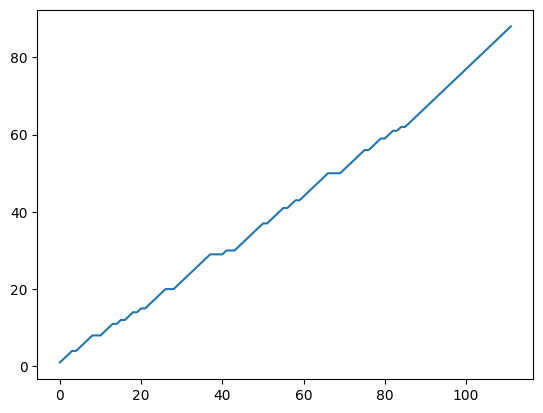

In [9]:
# this model is learning quite stable from the start

import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(correct))

In [10]:
# model was not so good on out of sample
accuracy_score(
    test["setosa"],
    model.predict_many(
        test[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
    ),
)

0.9736842105263158

In [11]:
# add a stratified train test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, stratify=data["class"])

In [12]:
from river import linear_model, metrics, multiclass

model = multiclass.OneVsRestClassifier(linear_model.LogisticRegression())
correct = []

for i, row in train.sample(frac=1).iterrows():
    X = row[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
    X = X.to_dict()

    y = row["class"]

    model.predict_one(X)
    correct.append(y == model.predict_one(X))

    model.learn_one(X, y)

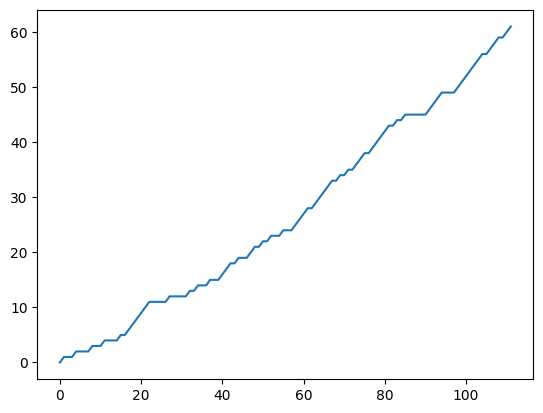

In [13]:
# this model predicts better after 40 observations

import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(correct))

In [14]:
model.predict_many(test[["sepal_length", "sepal_width", "petal_length", "petal_width"]])

91     Iris-virginica
34        Iris-setosa
115    Iris-virginica
85     Iris-virginica
53     Iris-virginica
0         Iris-setosa
72     Iris-virginica
55     Iris-virginica
130    Iris-virginica
149    Iris-virginica
134    Iris-virginica
27        Iris-setosa
140    Iris-virginica
38        Iris-setosa
74     Iris-virginica
6         Iris-setosa
117    Iris-virginica
54     Iris-virginica
48        Iris-setosa
127    Iris-virginica
78     Iris-virginica
42        Iris-setosa
145    Iris-virginica
25        Iris-setosa
35        Iris-setosa
37        Iris-setosa
107    Iris-virginica
83     Iris-virginica
119    Iris-virginica
87     Iris-virginica
28        Iris-setosa
79     Iris-virginica
47        Iris-setosa
7         Iris-setosa
144    Iris-virginica
67     Iris-virginica
125    Iris-virginica
69     Iris-virginica
dtype: object

In [15]:
# model scores 0.63 on the test data
from sklearn.metrics import accuracy_score

accuracy_score(
    test["class"],
    model.predict_many(
        test[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
    ),
)

0.6578947368421053